<a href="https://colab.research.google.com/github/suarningsih44/UAS_Pak-kusaa-klmpk1/blob/main/UAS_optimasitruk_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Inisialisasi lokasi outlet
num_locations = 50
num_trucks = 10
locations = np.random.rand(num_locations, 2) * 100  # 50 lokasi acak dalam area 100x100

# Fungsi jarak Euclidean
def distance(a, b):
    return np.linalg.norm(a - b)

# Total jarak rute untuk satu truk
def route_distance(route):
    dist = 0
    for i in range(len(route) - 1):
        dist += distance(locations[route[i]], locations[route[i+1]])
    return dist

# New Section

In [ ]:
# Fitness = total jarak semua truk (semakin kecil, semakin baik)
def fitness(chromosome):
    total_dist = 0
    for truck_route in chromosome:
        if len(truck_route) > 1:
            total_dist += route_distance(truck_route)
    return 1 / total_dist

# Inisialisasi populasi
def create_chromosome():
    indices = list(range(num_locations))
    random.shuffle(indices)
    split = np.array_split(indices, num_trucks)
    return [list(s) for s in split]

def create_population(size=30):
    return [create_chromosome() for _ in range(size)]

# Seleksi: Tournament
def selection(pop):
    return max(random.sample(pop, 5), key=fitness)

# Crossover: tukar satu rute antar truk
def crossover(p1, p2):
    child = []
    all_points = set()
    for t1, t2 in zip(p1, p2):
        if random.random() < 0.5:
            route = [x for x in t1 if x not in all_points]
        else:
            route = [x for x in t2 if x not in all_points]
        all_points.update(route)
        child.append(route)
    return child

Gen 1: Best Fitness = 0.0009
Gen 2: Best Fitness = 0.0015
Gen 3: Best Fitness = 0.0018
Gen 4: Best Fitness = 0.0026
Gen 5: Best Fitness = 0.0034
Gen 6: Best Fitness = 0.0040
Gen 7: Best Fitness = 0.0040
Gen 8: Best Fitness = 0.0045
Gen 9: Best Fitness = 0.0045
Gen 10: Best Fitness = 0.0045
Gen 11: Best Fitness = 0.0045
Gen 12: Best Fitness = 0.0045
Gen 13: Best Fitness = 0.0045
Gen 14: Best Fitness = 0.0045
Gen 15: Best Fitness = 0.0045
Gen 16: Best Fitness = 0.0045
Gen 17: Best Fitness = 0.0047
Gen 18: Best Fitness = 0.0047
Gen 19: Best Fitness = 0.0047
Gen 20: Best Fitness = 0.0047
Gen 21: Best Fitness = 0.0047
Gen 22: Best Fitness = 0.0050
Gen 23: Best Fitness = 0.0050
Gen 24: Best Fitness = 0.0050
Gen 25: Best Fitness = 0.0050
Gen 26: Best Fitness = 0.0050
Gen 27: Best Fitness = 0.0050
Gen 28: Best Fitness = 0.0050
Gen 29: Best Fitness = 0.0050
Gen 30: Best Fitness = 0.0050
Gen 31: Best Fitness = 0.0050
Gen 32: Best Fitness = 0.0050
Gen 33: Best Fitness = 0.0050
Gen 34: Best Fitnes

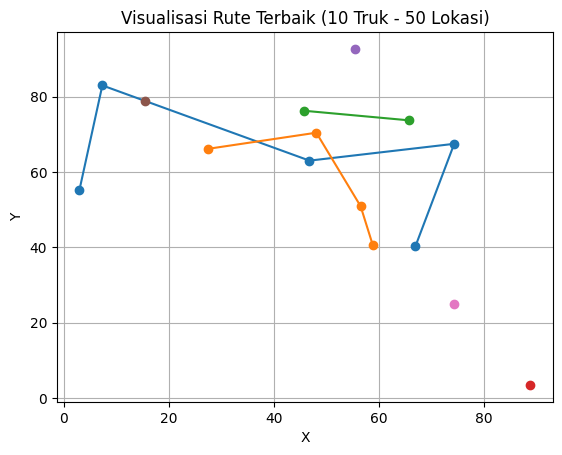

In [ ]:
# Mutasi: tukar dua lokasi dalam satu rute
def mutate(chromo, rate=0.1):
    for route in chromo:
        if random.random() < rate and len(route) > 1:
            i, j = random.sample(range(len(route)), 2)
            route[i], route[j] = route[j], route[i]
    return chromo

# Genetic Algorithm main loop
population = create_population()
generations = 100
best_fit = 0
best_solution = None

for gen in range(generations):
    new_population = []
    for _ in range(len(population)):
        parent1 = selection(population)
        parent2 = selection(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

        fit = fitness(child)
        if fit > best_fit:
            best_fit = fit
            best_solution = child

    population = new_population
    print(f"Gen {gen+1}: Best Fitness = {best_fit:.4f}")

# Visualisasi rute terbaik
colors = plt.cm.tab10(np.linspace(0, 1, num_trucks))
for idx, route in enumerate(best_solution):
    points = locations[route]
    plt.plot(points[:, 0], points[:, 1], marker='o', color=colors[idx])
plt.title("Visualisasi Rute Terbaik (10 Truk - 50 Lokasi)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()